### 선형회귀

#### 기본 선형회귀

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/300px-Normdist_regression.png" width="600">

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 재사용을 위해 랜덤값을 초기화(?)
torch.manual_seed(1)

- 선형회귀는 훈련(x_train) 데이터로 학습, 확인(y_train) 데이터를 확인하여 기울기와 편향(W,b) 값을 구한뒤
- 미지의 입력(x)이 들어왔을 때 어떤 출력(y)이 나올지 예상하는 지도학습 머신러닝 

In [13]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[3], [6], [9]])

x_train = x_train.to('cuda')
y_train = y_train.to('cuda')

In [23]:
x_train.shape

torch.Size([3, 1])

In [24]:
y_train.shape

torch.Size([3, 1])

- 파이토치는 텐서를 선언하고 자동미분을 통해 학습하는 구조입니다. 선형회귀 기본 가설인 y = Wx + b 에서 우리가 구하고자 하는 W와 b를 텐서로 초기화 해줍니다. requires_grad=True 를 갖는 2개의 텐서(tensor) W 와 b 를 만듭니다.

In [15]:
W = torch.zeros(1, requires_grad=True, device=0)
b = torch.zeros(1, requires_grad=True, device=0)
hypothesis = x_train * W + b

In [16]:
hypothesis

tensor([[0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<AddBackward0>)

#### 파이토치 경사하강법
- 손실함수는 평균제곱오차, 옵티마이저는 SGD(Stochastic Gradient Descent)를 사용. 손실 함수는 실제값과 예측값의 차이(loss, cost)를 수치화해주는 함수
- 오차가 크면 손실함수의 값이 커지고, 오차가 작으면 손실함수 값이 작아짐

<img src="https://user-images.githubusercontent.com/45377884/91630397-18838100-ea0c-11ea-8f90-515ef74599f1.png" width="730">



<img src="https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png" width="700">




In [50]:
X = torch.Tensor(2, 3)  ## 2 x 3 텐서 생성
X = X.to('cuda')

X

tensor([[-2.0691e-25,  1.3747e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]], device='cuda:0')

In [51]:
X = torch.Tensor([[1,2,3],[4,5,6]])
X = X.to('cuda')

X

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

$$ z = 2 * x^2 + 3 $$ 
- 위 수식에서 x에 대한 기울기를 구하는 코드


In [71]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = (2*y + 3).to('cuda')

target = torch.tensor([3.0, 4.0])
target = target.to('cuda')
loss = torch.sum(torch.abs(z - target)) # z와 목푯값인 target에 대한 손실 함수
loss.backward() # x에 대한 기울기 계산

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


C:\Users\perso\AppData\Local\Temp\ipykernel_30616\1443616936.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  print(x.grad, y.grad, z.grad)


- 학습하려는 모델의 매개변수와 학습률(learning rate) 하이퍼파라매터를 등록하여 옵티마이저를 초기화

In [17]:
# 여기서 x_train 의 크기와 y_train의 크기가 맞지 않을때 오류 발생
# 원래 텐서플로에서는 8:2 또는 7:3 아니었나?
cost = torch.mean((hypothesis - y_train) ** 2)
optimizer = optim.SGD([W, b], lr=0.01)

- 최적화 단계의 각 반복(iteration)을 에폭
	- 학습 단계(train loop) - 학습용 데이터셋을 반복(iterate)하고 최적의 매개변수로 수렴
	- 검증/테스트 단계(validation/test loop) - 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터셋을 반복(iterate).

In [18]:
nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/1000 W: 0.280, b: 0.120 Cost: 42.000000
Epoch  100/1000 W: 2.619, b: 0.867 Cost: 0.108384
Epoch  200/1000 W: 2.700, b: 0.682 Cost: 0.066975
Epoch  300/1000 W: 2.764, b: 0.536 Cost: 0.041386
Epoch  400/1000 W: 2.815, b: 0.421 Cost: 0.025574
Epoch  500/1000 W: 2.854, b: 0.331 Cost: 0.015803
Epoch  600/1000 W: 2.886, b: 0.260 Cost: 0.009765
Epoch  700/1000 W: 2.910, b: 0.205 Cost: 0.006034
Epoch  800/1000 W: 2.929, b: 0.161 Cost: 0.003729
Epoch  900/1000 W: 2.944, b: 0.126 Cost: 0.002304
Epoch 1000/1000 W: 2.956, b: 0.099 Cost: 0.001424


- 학습된 W 와 b 값으로 새로운 입력에 대한 예측
	- 기록을 추적하는 것(메모리를 사용하는 것)을 방지하기 위해 with torch.no.grad(): 로 코드 block

In [20]:
test_var =  torch.FloatTensor([[4.0]])

test_var = test_var.to('cuda')
# 입력한 값 4에 대해서 예측값 y를 계산해서 pred_y에 저장
with torch.no_grad():
    pred_y = test_var * W + b
    print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[11.9245]], device='cuda:0')


#### nn.Module 로 구현하는 선형회귀

tensor([[1.],
        [2.],
        [3.]], device='cuda:0')

In [22]:
y_train

tensor([[3.],
        [6.],
        [9.]], device='cuda:0')

- nn.Module의 nn.Linear() 함수는 선형회귀를 자동으로 수행 합니다. 입력의 차원, 출력의 차원을 인수로 받습니다. 단순 선형 회귀이므로 input_dim=1, output_dim=1로 지정

In [29]:
input_dim = 1
output_dim = 1
model = nn.Linear(input_dim, output_dim, device=0)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

- epoch 100번 반복

In [30]:
nb_epochs = 100
for epoch in range(nb_epochs+1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0: 
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/100 Cost: 50.377792
Epoch   10/100 Cost: 5.162527
Epoch   20/100 Cost: 0.839981
Epoch   30/100 Cost: 0.412016
Epoch   40/100 Cost: 0.355662
Epoch   50/100 Cost: 0.335425
Epoch   60/100 Cost: 0.319326
Epoch   70/100 Cost: 0.304287
Epoch   80/100 Cost: 0.289983
Epoch   90/100 Cost: 0.276355
Epoch  100/100 Cost: 0.263367


- model.parameters를 통해 W와 b값을 확인

In [31]:
list(model.parameters())

[Parameter containing:
 tensor([[2.4054]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([1.3517], device='cuda:0', requires_grad=True)]

In [32]:
new_var =  torch.FloatTensor([[4.0]]) 
new_var = new_var.to('cuda')

In [33]:
pred_y = model(new_var) # forward 연산

In [34]:
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[10.9732]], device='cuda:0', grad_fn=<AddmmBackward0>)


#### nn.Module Class로 구현하는 선형회귀

- LinearRegressionModel Class를 선언

In [35]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1, device=0)

    def forward(self, x):
        return self.linear(x)

- model 과 optimizer 생성

In [36]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [37]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수
    optimizer.zero_grad()
    cost.backward() # backward 연산
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost: 67.298912
Epoch  100/2000 Cost: 0.046260
Epoch  200/2000 Cost: 0.028586
Epoch  300/2000 Cost: 0.017664
Epoch  400/2000 Cost: 0.010915
Epoch  500/2000 Cost: 0.006745
Epoch  600/2000 Cost: 0.004168
Epoch  700/2000 Cost: 0.002576
Epoch  800/2000 Cost: 0.001592
Epoch  900/2000 Cost: 0.000983
Epoch 1000/2000 Cost: 0.000608
Epoch 1100/2000 Cost: 0.000376
Epoch 1200/2000 Cost: 0.000232
Epoch 1300/2000 Cost: 0.000143
Epoch 1400/2000 Cost: 0.000089
Epoch 1500/2000 Cost: 0.000055
Epoch 1600/2000 Cost: 0.000034
Epoch 1700/2000 Cost: 0.000021
Epoch 1800/2000 Cost: 0.000013
Epoch 1900/2000 Cost: 0.000008
Epoch 2000/2000 Cost: 0.000005


In [39]:
new_var =  torch.FloatTensor([[4.0]])
new_var = new_var.to('cuda')
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
with torch.no_grad():
    pred_y = model(new_var) # forward 연산
    print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[11.9956]], device='cuda:0')


- [위키독스 참조](https://wikidocs.net/156990)

### torch 자동미분

#### 역전파 활용 자동미분

$$ y = W^3 + 2W^2 +7 $$ 
W = 3 값에 대한 미분을 진행

In [46]:
w = torch.tensor(3.0, requires_grad=True, device=0)
w = w.to('cuda')

In [47]:
y = w**3 + 2*w**2 + 7
y.backward() # 수식에 대한 미분 진행
print(f'w**3 + 2*w**2 + 7 = {w.grad}')

w**3 + 2*w**2 + 7 = 39.0


#### 선형회귀분석
- 모델 생성 후 기울기 계산, w, b 업데이트 진행

In [107]:
import torch
import torch.nn as nn # torch.nn에는 신경망 모델들이 포함되어 있음 / 레이어 쌓는 것
import torch.optim as optim # 경사하강법 알고리즘
import torch.nn.init as init # 텐서에 초깃값을 주기 위한 함수 포함

In [75]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ---------------------------- --------- 122.9/165.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.5 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/8.0 MB 19.0 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.0 MB 17.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 12.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/8.0 MB 13.1 MB/s eta 0:00:01
   ----------------- ---------------------- 3.6/8.0 MB 16.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/8.0 MB 18.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.4/8.0 MB 20.5 MB/s eta 0:00:01
   --------------------------

In [76]:
!pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.6 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.6/11.6 MB 27.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.1/11.6 MB 36.4 MB/s eta 0:00:01
   ------------------------- -------------- 7.4/11.6 MB 43.0 MB/s eta 0:00:01
   ------------------------------- -------- 9.1/11.6 MB 38.7 MB/s eta 0:00:01
   ---------------------------------------  11.4/11.6 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 43.5 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 36.4 MB/s eta 0:00:00
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [108]:
import matplotlib.pyplot as plt
import pandas as pd

- 데이터 준비

In [109]:
num_data = 1000 # 사용할 데이터의 수
num_epoch = 500 # 경사하강법 반복 횟수

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10) # -10부터 10까지 숫자 중에 무작위로 num_data 수만큼 생성
noise = init.normal_(torch.FloatTensor(num_data, 1), std=3) # 현실성 반영을 위해 노이즈를 추가한 것
y = 2*x + 3
y_noise = y + noise

- 산점도 표시

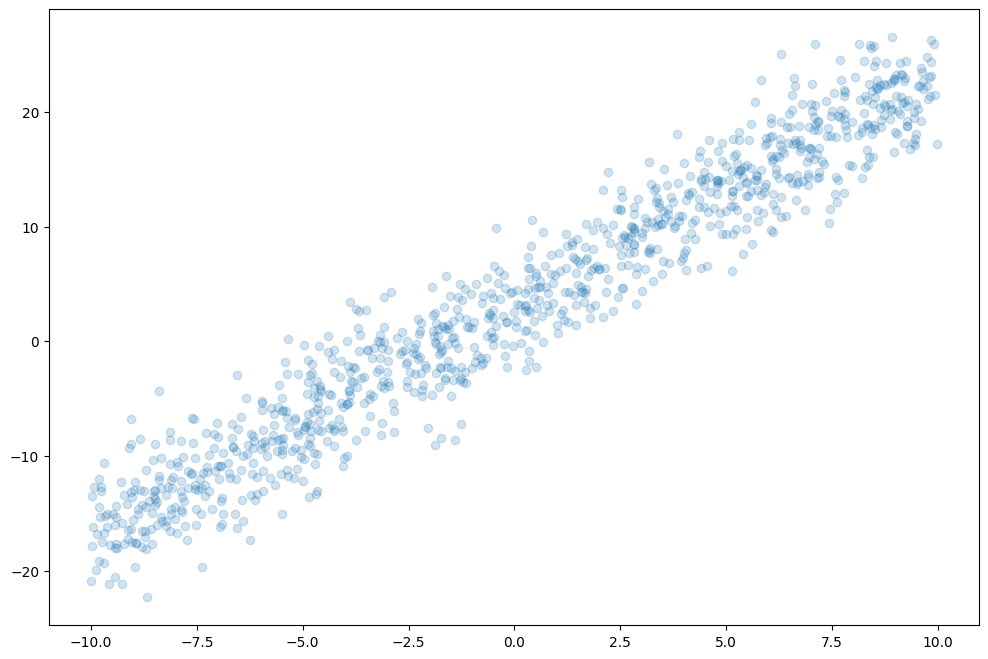

In [110]:
plt.figure(figsize=(12,8))
plt.scatter(x, y_noise, alpha=0.2)
plt.show()

- 모델/손실함수

In [111]:
model = nn.Linear(1,1) # 1개 특성을 가진 x, y
loss_func = nn.L1Loss()

- 옵티마이저

In [112]:
opt = optim.SGD(model.parameters(), lr=0.001)

- 학습
	- 경사하강법을 사용한 최적화 과정을 num_epoch 수만큼 반복하며, 각 반복 시 지난번에 계산했던 기울기를 0으로 초기화하는 optimizer.zero_grad()를 실행합니다. 기울기를 초기화해야 새로운 가중치와 편차에 대해 새 값을 도출

In [96]:
!pip install jupyter

  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached QtPy-2.4.1-py3-none-any.whl.metadata (12 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/139.4 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------- 30.7/139.4 kB 1.3 MB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 648.1 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/139.4 kB 558.5 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.4 kB 552.2 kB/s eta 0:00:01
   ------------------------------------ - 133.1/139.4 kB 522.9 kB/s eta 0:00:01
   -----

In [121]:
!pip install ipywidgets

In [120]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [133]:
# from tqdm.notebook import tqdm
from ipywidgets import interactive
from tqdm import tqdm




Exception ignored in: <function tqdm.__del__ at 0x000002C1546F3BE0>
Traceback (most recent call last):
  File "d:\01_Programming\100_HugoBank\Mine\study-pytorch\pytorch_env\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "d:\01_Programming\100_HugoBank\Mine\study-pytorch\pytorch_env\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000002C1546F3BE0>
Traceback (most recent call last):
  File "d:\01_Programming\100_HugoBank\Mine\study-pytorch\pytorch_env\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "d:\01_Programming\100_HugoBank\Mine\study-pytorch\pytorch_env\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <fu

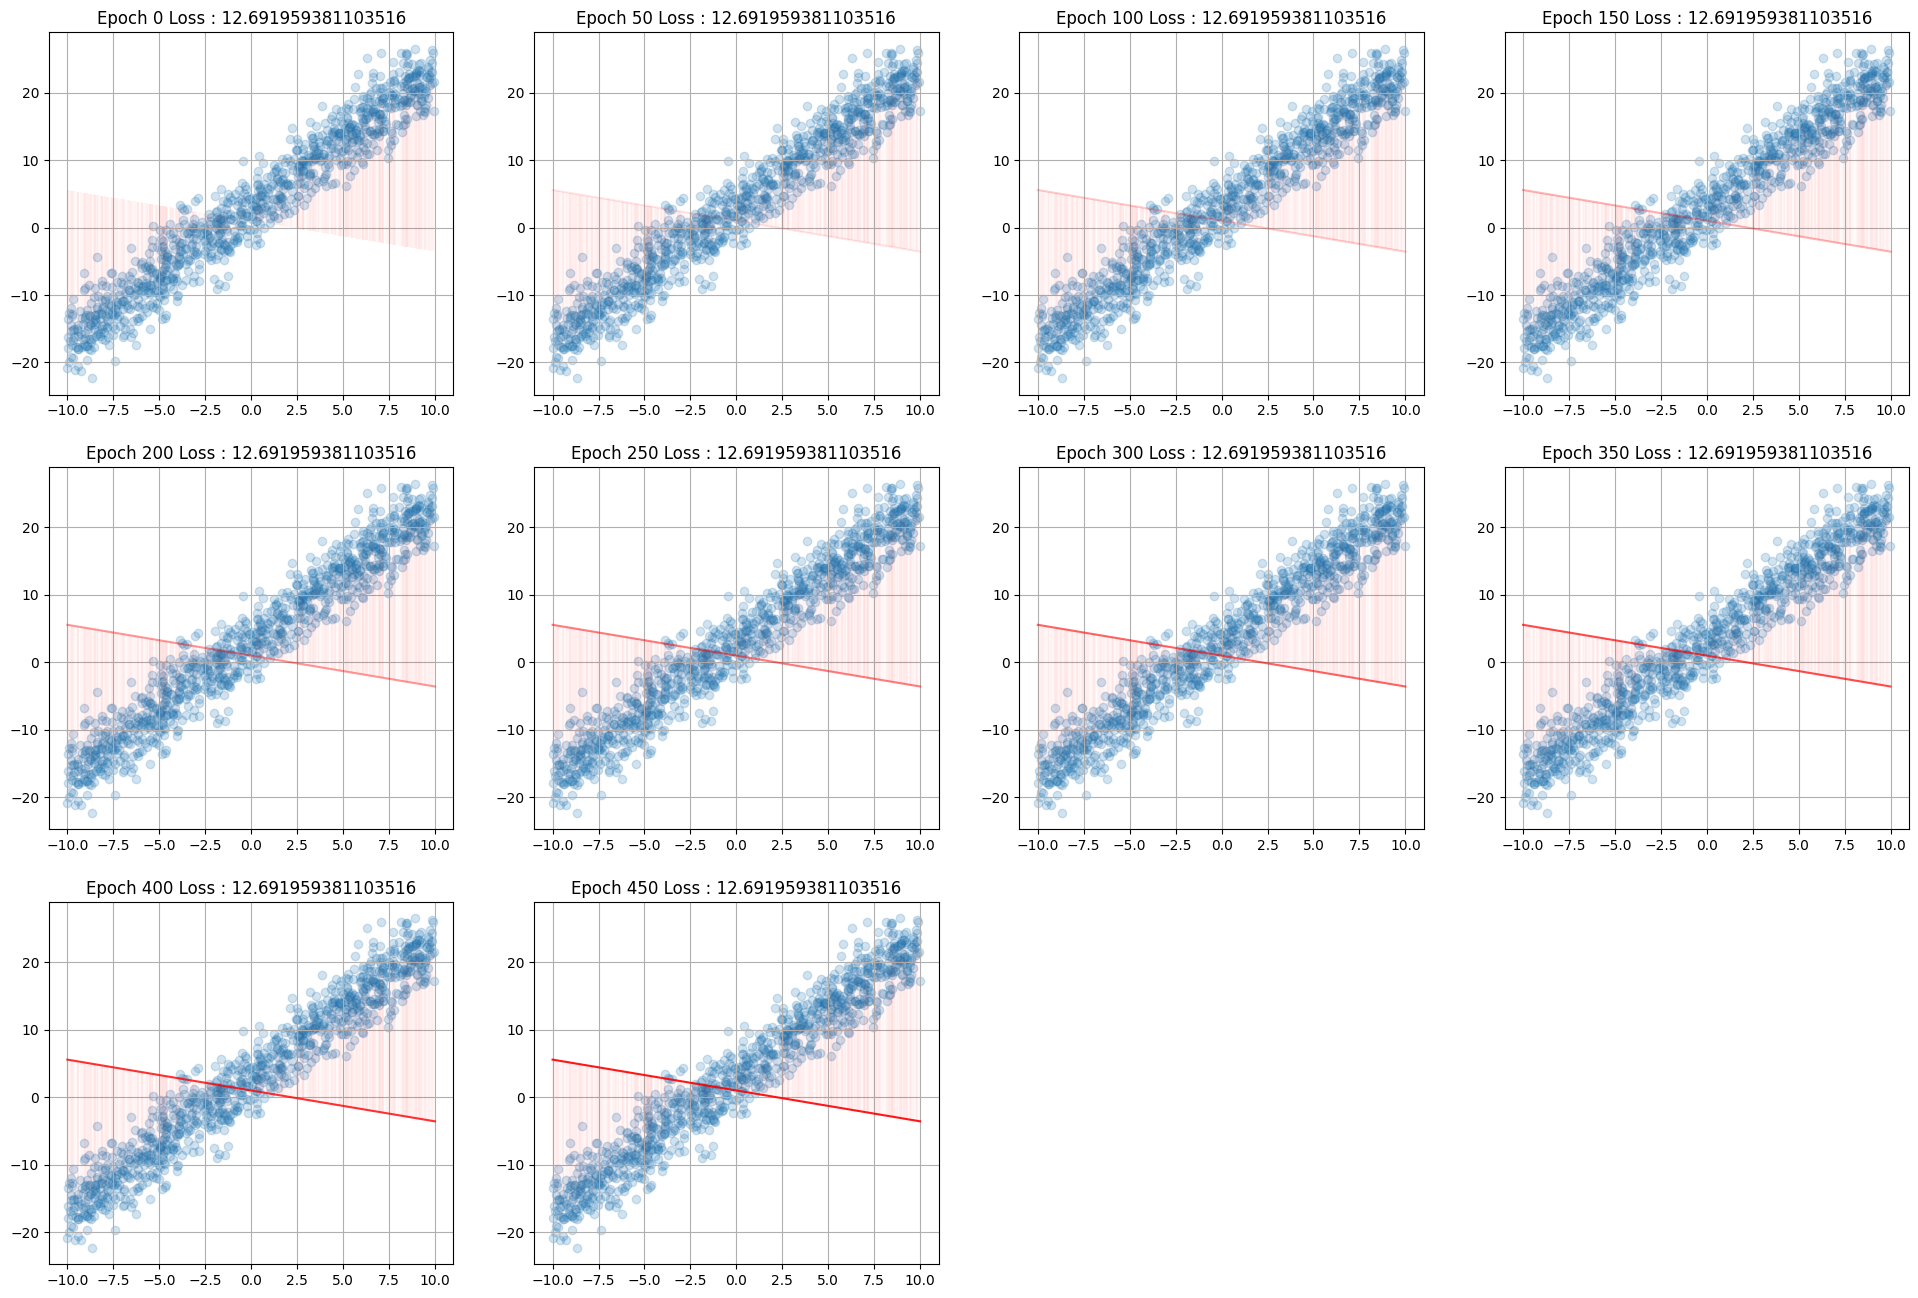

In [135]:
label = y_noise
loss_lst = []

fig = plt.figure(figsize=(24,16))

for n in tqdm(range(num_epoch)):
    optimizer.zero_grad() # 기울기를 0으로 초기화
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step() # 변수들의 기울기 업데이트
    
    if n % 50 == 0:
#         print(loss.data)
        
        plt.subplot(3, 4, n//50 + 1)
        plt.scatter(x, y_noise, alpha=0.2)
        plt.plot([-10, 10], model(torch.Tensor([[-10],[10]])).squeeze().detach().numpy(), 
                 color='r', alpha=(n/num_epoch))
        
        for i in range(num_data):
            y_true = y_noise[i].item()
            y_pred = model(torch.Tensor([x[i]])).detach().numpy()
            plt.vlines(x[i],min(y_true,y_pred), max(y_true, y_pred), color='red', alpha=0.01)
        
        plt.title(f"Epoch {n} Loss : {loss.item()}")
        plt.grid(True)
    
    loss_lst.append(loss.data.item())

plt.show()

In [136]:
param_list = list(model.parameters())
print(param_list[0].item(), param_list[1].item())

-0.45751237869262695 0.9958349466323853


- model(torch.Tensor([[-10],[10]])).squeeze().detach().numpy()의 의미

In [137]:
model(torch.Tensor([0]))

tensor([0.9958], grad_fn=<ViewBackward0>)

In [138]:
model(torch.Tensor([0])).detach()

tensor([0.9958])

In [139]:
model(torch.Tensor([0])).detach().numpy()

array([0.99583495], dtype=float32)

- 손실함수값 축소 시각화

In [140]:
loss_df = pd.DataFrame(loss_lst)

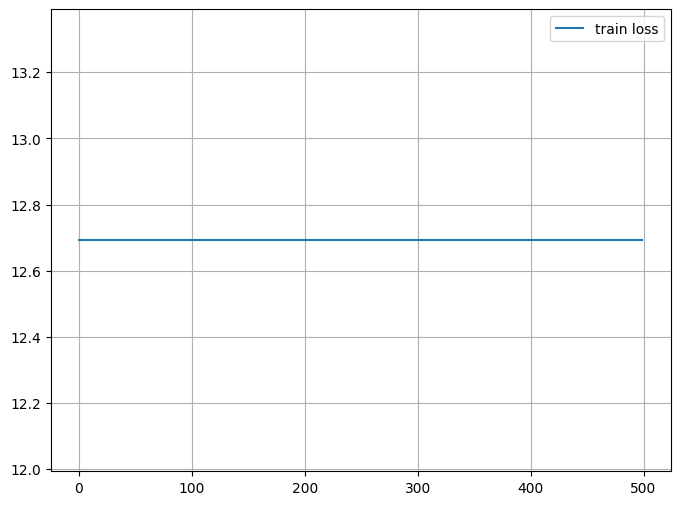

In [141]:
loss_df.plot(figsize=(8,6))
plt.legend(["train loss"])
plt.grid(True)
plt.show()

#### 선형회귀 비교 (sklearn vs pytorch)

##### SKlearn

In [145]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 14.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.3/11.0 MB 16.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/11.0 MB 15.1 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.0 MB 26.6 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 22.8 MB/s eta 0:00:01
   ------------------------- -------------- 6.9/11.0 MB 25.9 MB/s eta 0:00:01
   --------------------------------- ------ 9.3/11.0 MB 29.6 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 29.7 MB/s eta 0:00:00
   --

In [146]:
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

Exception ignored in: <function tqdm.__del__ at 0x000002C1546F3BE0>
Traceback (most recent call last):
  File "d:\01_Programming\100_HugoBank\Mine\study-pytorch\pytorch_env\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "d:\01_Programming\100_HugoBank\Mine\study-pytorch\pytorch_env\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


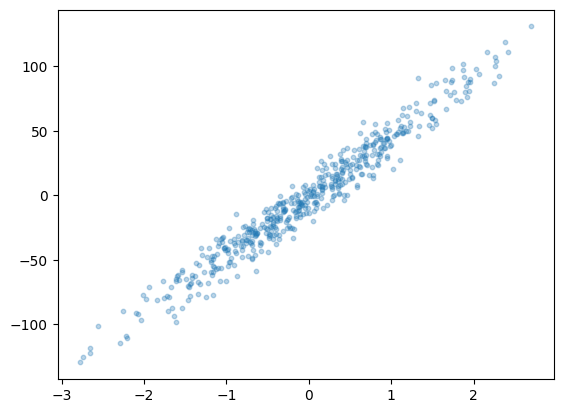

In [147]:
X, y, c = make_regression(n_samples=500, n_features=1, bias=0, noise=10, coef=True, random_state=0)
plt.scatter(X, y, s=10, alpha=0.3)
plt.show()

In [148]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

LinearRegression()

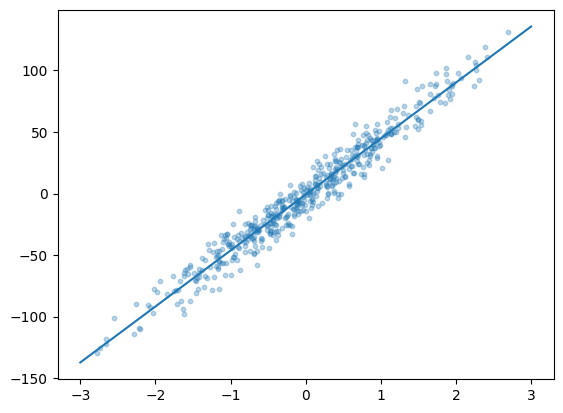

In [149]:
plt.scatter(X, y, s=10, alpha=0.3)
plt.plot([-3, 3], model_sklearn.predict([[-3],[3]]).squeeze())
plt.show()

##### PyTorch

In [150]:
import torch
import torch.nn as nn
import torch.optim

In [151]:
model_torch = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model_torch.parameters(), lr=0.1)

In [152]:
X_tensor = torch.FloatTensor(X)
label = torch.FloatTensor(y)
loss_lst2 = []

for n in range(num_epoch):
    optimizer.zero_grad() # 기울기를 0으로 초기화
    output = model_torch(X_tensor).squeeze()
    
    loss = loss_func(label, output)
    loss.backward()
    optimizer.step() # 변수들의 기울기 업데이트
    loss_lst2.append(loss.data.item())

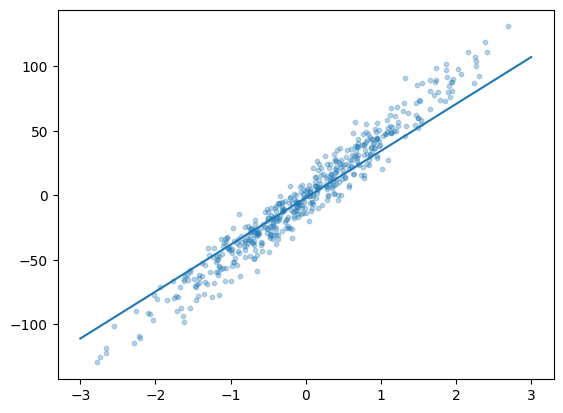

In [153]:
plt.scatter(X, y, s=10, alpha=0.3)
plt.plot([-3, 3], model_torch(torch.Tensor([[-3], [3]])).squeeze().detach().numpy())
plt.show()

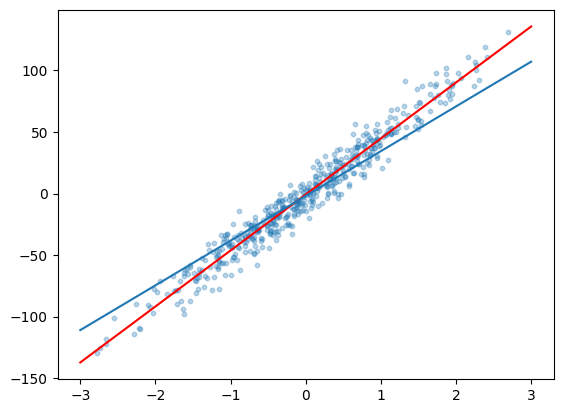

In [155]:
# Sklearn과 PyTorch 비교
plt.scatter(X, y, s=10, alpha=0.3)
plt.plot([-3, 3], model_sklearn.predict([[-3],[3]]).squeeze(), color="red")
plt.plot([-3, 3], model_torch(torch.Tensor([[-3], [3]])).squeeze().detach().numpy())
plt.show()